# DATA UNDERSTANDING
    

Wanting to know what actions to be taken according to the information in the datasets to know the answer to the following questions.
1. Top  5 genres produced
2. What is the return investment on the production budget used.
3. Competition amongst the studios in terms of their total gross values.


In [1]:
# importing the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the first dataset
df = pd.read_csv("C:\\Users\\Karen\\Documents\\Microsoft-project\\Microsoft-project\\zippedData\\bom.movie_gross.csv.gz")
df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
df.dropna(subset=['foreign_gross'], inplace=True)

In [4]:
df.isna().sum()

title              0
studio             4
domestic_gross    28
foreign_gross      0
year               0
dtype: int64

In [5]:
df.dropna(subset=['domestic_gross'], inplace=True)

In [6]:
df.isna().sum()

title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [7]:
# replacing string object with a float 
df['foreign_gross'] = df['foreign_gross'].str.replace(',','').astype(float)

In [8]:
df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010
3,Inception,WB,292600000.0,535700000.0,2010
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010


In [9]:
df['total_gross'] = df['domestic_gross'] + df['foreign_gross']
df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [10]:
# describing the dataset to get a statistical view of it
df.describe()

,domestic_gross,foreign_gross,year,total_gross
count,2.009000e+03,2.009000e+03,2009.000000,2.009000e+03
mean,4.697311e+07,7.571822e+07,2013.503235,1.226913e+08
std,8.159966e+07,1.381296e+08,2.598481,2.074870e+08
min,4.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,6.650000e+05,3.900000e+06,2011.000000,8.141000e+06
50%,1.650000e+07,1.930000e+07,2013.000000,4.230000e+07
75%,5.600000e+07,7.590000e+07,2016.000000,1.337000e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [11]:
# checking the information to see if there are any missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
 5   total_gross     2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.9+ KB


In [12]:
# getting the shape of the dataset
df.shape

(2009, 6)

As of now there are 2009 rows and 6 columns after dropping null values in the necessary columns

In [13]:
# creating a new variable to view the top studios
top_studios = df.groupby('studio')['domestic_gross', 'foreign_gross', 'total_gross', 'studio'].sum().sort_values(by = 'domestic_gross', ascending=False).head(15)
top_studios

,domestic_gross,foreign_gross,total_gross
studio,,,
BV,1.839653e+10,2.579385e+10,4.419038e+10
Uni.,1.289204e+10,1.685477e+10,2.974681e+10
WB,1.212360e+10,1.866790e+10,3.079150e+10
Fox,1.092450e+10,2.005587e+10,3.098037e+10
Sony,8.459479e+09,1.394524e+10,2.240472e+10
Par.,7.580813e+09,1.186338e+10,1.944420e+10
LGF,3.991851e+09,4.475619e+09,8.467471e+09
WB (NL),3.975100e+09,6.339000e+09,1.031410e+10
LG/S,1.965200e+09,3.353724e+09,5.318924e+09


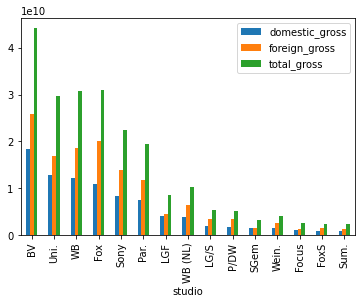

In [14]:
# plotting a bargraph for the above information
top_studios.plot(y=['domestic_gross', 'foreign_gross', 'total_gross'], kind='bar', use_index=True);

Above we can see that domestic gross for most studios is less than the foreign gross.
This means that they gain more by selling the films they make internatinally making their total gross which
is their return investment a lot more.

#### Finding the relatonship between variables

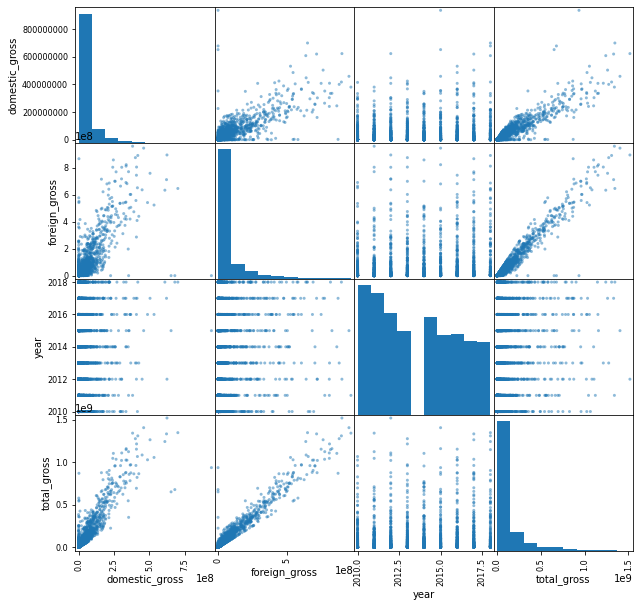

In [15]:
pd.plotting.scatter_matrix(df, figsize=(10,10));
plt.style.use('bmh')

Above we can see both domestic and foreign gross have positive correlations

### Data Cleaning

In [16]:
# checking for null values
df.isna().any()

title             False
studio             True
domestic_gross    False
foreign_gross     False
year              False
total_gross       False
dtype: bool

 only studio column contains missing values.

In [17]:
# checking for duplicated values
duplicates = df[df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,title,studio,domestic_gross,foreign_gross,year,total_gross


There are no duplicated values in this dataset.

In [18]:
# changes made
df.isna().sum()

title             0
studio            2
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 3353
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2009 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2009 non-null   float64
 3   foreign_gross   2009 non-null   float64
 4   year            2009 non-null   int64  
 5   total_gross     2009 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 109.9+ KB


In [20]:
# dealing with the missing values in studio
df = df.dropna()
df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
3286,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
3309,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [21]:
df.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
total_gross       0
dtype: int64

## SECOND DATASET

In [22]:
# loading the dataset
data = pd.read_csv("C:\\Users\\Karen\\Documents\\Microsoft-project\\Microsoft-project\\zippedData\\tn.movie_budgets.csv.gz")

## Data Uderstanding

In [23]:
# decribe to get a statistical view on it
data.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


In [24]:
# getting information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


It looks like there are no missing values.

In [25]:
# looking into the first five rows
data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [26]:
# looking at more rows to depict the genres
data.head(15)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


The type of genres here, mostly Action and Action & Adventure seem to have a high production_budget cost,
nevertheless having a higher domestic and worldwide gross profit.

In [27]:
# checking the last rows
data.tail()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [29]:
# checking the shape of the dataset
data.shape

(5782, 6)

There are 5782 columns and 6 rows

### Finding the relationship between variables

In [30]:
data['production_budget'] = data['production_budget'].str.replace(',', '').str.replace('$', '').astype(int)
data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,"$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,"$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,"$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,"$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,"$620,181,382","$1,316,721,747"


In [31]:

data['domestic_gross'] = data['domestic_gross'].str.replace(',', '').str.replace('$', '').astype(int)
data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,"$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,"$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,"$1,316,721,747"


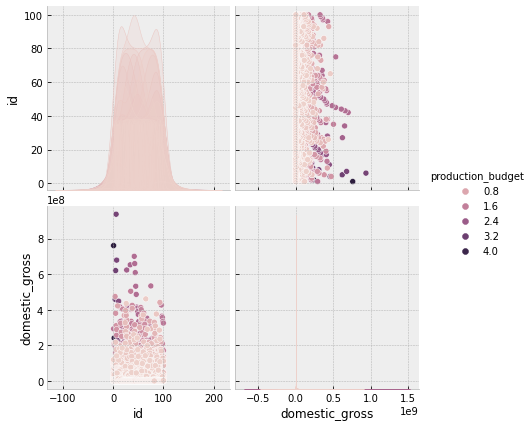

In [32]:
sns.pairplot(data, hue="production_budget", height=3);

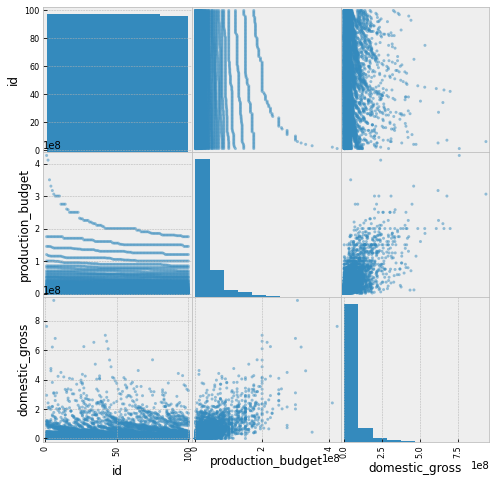

In [33]:
pd.plotting.scatter_matrix(data, figsize=(8,8));
plt.style.use('seaborn-deep')

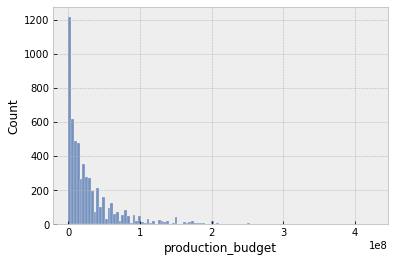

In [34]:
sns.histplot(data = data['production_budget']);

## Data Cleaning

In [35]:
# finding missing values
data.isna().any()


id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

Seems there's no column with missing data

In [36]:
# finding the number of missing values
data.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [37]:
# checking for duplicated values
duplicates = data[data.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


There's no duplicated values too

#### Dealing with outliers

In [38]:
def outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 - 1.5*IQR
    
    result  = data.index[(data[col] < lower_bound)|
    (data[col] > upper_bound)]
    
    return result

In [39]:
index_list = []

for j in ['production_budget']:
    index_list.extend(outliers(data, j))

In [40]:
len(index_list)

5782

In [41]:
index_list = []

for k in ['domestic_gross']:
    index_list.extend(outliers(data, k))

In [42]:
len(index_list)

5782

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int32 
 4   domestic_gross     5782 non-null   int32 
 5   worldwide_gross    5782 non-null   object
dtypes: int32(2), int64(1), object(3)
memory usage: 226.0+ KB


Seems the numberof outliers ate too many outliers to be romoved as this will affect the accuracy of the dataset

# THIRD DATASET

In [44]:
movie_df = pd.read_csv("C:\\Users\\Karen\\Documents\\Microsoft-project\\Microsoft-project\\zippedData\\rt.movie_info.tsv.gz", "\t")

## Data Understanding

In [45]:
# describe to see summary statistics of the data set
movie_df.describe()

,id
count,1560.000000
mean,1007.303846
std,579.164527
min,1.000000
25%,504.750000
50%,1007.500000
75%,1503.250000
max,2000.000000


In [46]:
# head to see the first five rows
movie_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [47]:
movie_df.head(15)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [48]:
# checking for the last rows
movie_df.tail()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


In [49]:
# checking for the shape
movie_df.shape

(1560, 12)

There are 1560 rows and 12 columns

In [50]:
# getting information about the dataset 
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


## Finding the relationship between variables

### Data Cleaning

In [51]:
# finding missing values
movie_df.isna().any()

id              False
synopsis         True
rating           True
genre            True
director         True
writer           True
theater_date     True
dvd_date         True
currency         True
box_office       True
runtime          True
studio           True
dtype: bool

In [52]:
# finding the number of missing values
movie_df.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

All the columns have missing data except the id one

Working on cleaning the genre and studio columns according to the information we need from our business understanding.

In [53]:
# dropping the columns not needed
new_set = movie_df.drop(movie_df.columns[[0, 1, 4, 5, 6, 7, 8, 9, 10]], axis=1)
new_set

,rating,genre,studio
0,R,Action and Adventure|Classics|Drama,NaN
1,R,Drama|Science Fiction and Fantasy,Entertainment One
2,R,Drama|Musical and Performing Arts,NaN
3,R,Drama|Mystery and Suspense,NaN
4,NR,Drama|Romance,NaN
...,...,...,...
1555,R,Action and Adventure|Horror|Mystery and Suspense,New Line Cinema
1556,PG,Comedy|Science Fiction and Fantasy,Paramount Vantage
1557,G,Classics|Comedy|Drama|Musical and Performing Arts,NaN
1558,PG,Comedy|Drama|Kids and Family|Sports and Fitness,NaN


In [54]:
# checking for duplicates
duplicates = new_set[new_set.duplicated()]
print(len(duplicates))
duplicates.head(30)

703


,rating,genre,studio
25,R,Drama,NaN
28,R,Drama,NaN
43,R,Drama,NaN
49,R,Action and Adventure|Drama|Mystery and Suspense,NaN
55,R,Comedy,NaN
58,R,Action and Adventure|Classics|Drama,NaN
62,R,Action and Adventure|Drama|Mystery and Suspense,NaN
67,NR,Drama,NaN
77,R,Comedy|Drama,NaN
80,NR,Comedy|Drama,NaN


I checked for duplicates to know which genres are most produced.

Working with data from the first and third dataset

In [55]:
combined_data = pd.merge(left = df, right = new_set, how = 'inner', on = 'studio')
combined_data

,title,studio,domestic_gross,foreign_gross,year,total_gross,rating,genre
0,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,960300000.0,R,Drama|Mystery and Suspense
1,Inception,WB,292600000.0,535700000.0,2010,828300000.0,R,Drama|Mystery and Suspense
2,Clash of the Titans (2010),WB,163200000.0,330000000.0,2010,493200000.0,R,Drama|Mystery and Suspense
3,Due Date,WB,100500000.0,111200000.0,2010,211700000.0,R,Drama|Mystery and Suspense
4,Yogi Bear,WB,100200000.0,101300000.0,2010,201500000.0,R,Drama|Mystery and Suspense
...,...,...,...,...,...,...,...,...
360,Lady Bird,A24,49000000.0,30000000.0,2017,79000000.0,R,Drama|Horror
361,The Disaster Artist,A24,21100000.0,8700000.0,2017,29800000.0,R,Drama|Horror
362,It Comes At Night,A24,14000000.0,5300000.0,2017,19300000.0,R,Drama|Horror
363,Hereditary,A24,44100000.0,35300000.0,2018,79400000.0,R,Drama|Horror


In [56]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           365 non-null    object 
 1   studio          365 non-null    object 
 2   domestic_gross  365 non-null    float64
 3   foreign_gross   365 non-null    float64
 4   year            365 non-null    int64  
 5   total_gross     365 non-null    float64
 6   rating          365 non-null    object 
 7   genre           365 non-null    object 
dtypes: float64(3), int64(1), object(4)
memory usage: 25.7+ KB


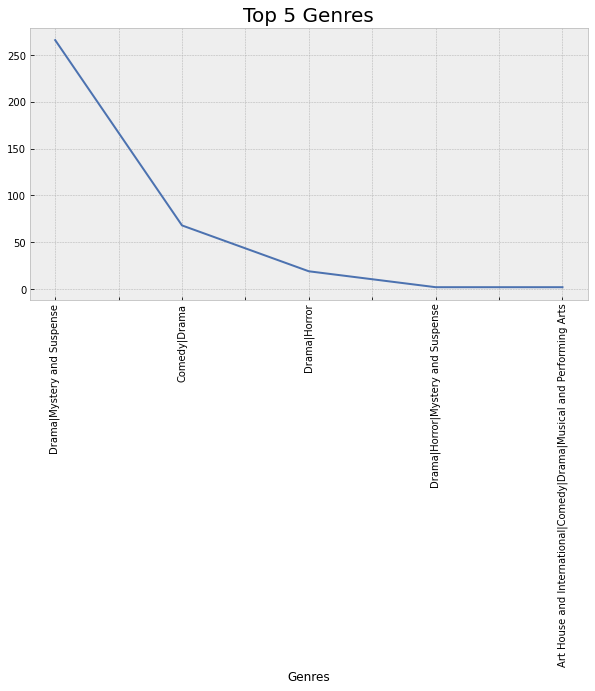

In [57]:
# plotting 
graph = combined_data['genre'].value_counts().head()
plt.figure(figsize=(20,20))
ax = graph.plot(kind='line', figsize=(10,5))
ax.set_title('Top 5 Genres', fontsize=20)
ax.set_xlabel('Genres')
plt.xticks(rotation=90)
ax;



In [58]:
df_movie = combined_data.groupby('genre')['domestic_gross'].sum().sort_values(ascending = False).head()

In [59]:
df_movie

genre
Drama|Mystery and Suspense           2.321410e+10
Drama|Horror                         2.604568e+08
Drama|Romance                        1.660000e+08
Drama|Horror|Mystery and Suspense    1.660000e+08
Drama                                1.660000e+08
Name: domestic_gross, dtype: float64

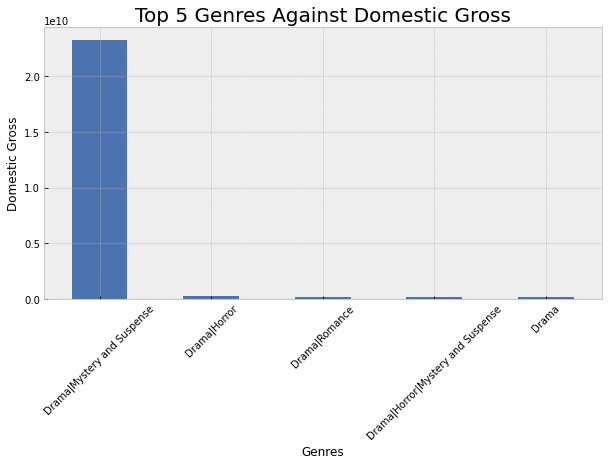

In [60]:
plt.figure(figsize=(20,20))
ax = df_movie.plot(kind='bar', figsize=(10,5))
ax.set_title('Top 5 Genres Against Domestic Gross', fontsize=20)
ax.set_xlabel('Genres')
ax.set_ylabel('Domestic Gross')
plt.xticks(rotation=45)
ax;



## Data Analysis according to our questions.

#### Univariate EDA

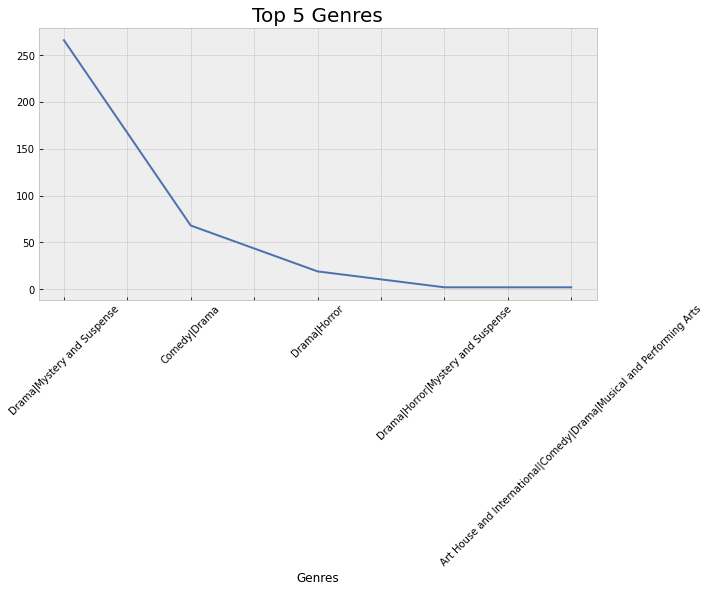

In [61]:
# the genres that are mostly produced
graph = combined_data['genre'].value_counts().head()
plt.figure(figsize=(20,20))
ax = graph.plot(kind='line', figsize=(10,5))
ax.set_title('Top 5 Genres', fontsize=20)
ax.set_xlabel('Genres')
plt.xticks(rotation=45)
ax;




Using the genre variable and its value counts, we can see that the top movies produced are mostly drama related. 

#### Bivariate EDA

Looking at the data visualization plot on production budget against domestic gross, we see a positive correlation 
between the two.